In [364]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [365]:
df = pd.read_csv('../data/final.csv', index_col=[0])

In [366]:
df

,КоличествоЧеков,КоличествоЧековВсе,СреднийЧек,СреднееЧислоТоваровЧека,СреднееЧислоТоваровЧекаВсе,Выручка,ВыручкаВся,КоличествоТоваров,КоличествоТоваровВсе,СредняяМаржа,СредняяМаржаВся,ДоляВыкупленных,ПроцентОтмен,ДатаПоследнегоЗаказаВЫК,ДатаПоследнегоЗаказа,ИГРУШКИ,ППКП,ОДЕЖДА,КГТ,ИНОЕ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ.1,ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,СОПУТСТВУЮЩИЕ ТОВАРЫ,ЖЕНСКИЕ ШТУЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ | КАНЦТОВАРЫ",ИГРУШКИ | ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ДЕТСКОЕ ПИТАНИЕ | ЗАМЕНИТЕЛИ МОЛОКА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | АКСЕССУАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКОЕ БЕЛЬЁ",КРУПНОГАБАРИТНЫЙ ТОВАР | КОЛЯСКИ,"ИГРУШКИ | ФИГУРЫ, ПЕРСОНАЖИ",ПОДГУЗНИКИ | ПОДГУЗНИКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА",ИГРУШКИ | АКТИВНЫЙ ОТДЫХ,КОСМЕТИКА/ГИГИЕНА | ДЕТСКАЯ КОСМЕТИКА,КОСМЕТИКА/ГИГИЕНА | ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,КРУПНОГАБАРИТНЫЙ ТОВАР | АВТОКРЕСЛА,КРУПНОГАБАРИТНЫЙ ТОВАР | КОЛЯСКИ ДЛЯ КУКОЛ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | БУТЫЛОЧКИ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | СОСКИ/ПУСТЫШКИ,ДЕТСКОЕ ПИТАНИЕ | БАКАЛЕЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)",КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА ГИГИЕНЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ПОСТЕЛЬНОЕ БЕЛЬЕ",ПОДГУЗНИКИ | ПЕЛЕНКИ ОДНОРАЗОВЫЕ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",КОСМЕТИКА/ГИГИЕНА | ТОВАРЫ ДЛЯ МАМ,ОБУВЬ | ОБУВЬ ДЕТСКАЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКАЯ ОДЕЖДА (2-6 лет)",ИГРУШКИ | НАСТОЛЬНЫЕ ИГРЫ,ДЕТСКОЕ ПИТАНИЕ | КАШИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ | ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ",ИГРУШКИ | МЯГКИЕ ИГРУШКИ,ИГРУШКИ | ТВОРЧЕСТВО,ДЕТСКОЕ ПИТАНИЕ | ПЮРЕ,ДЕТСКОЕ ПИТАНИЕ | НАПИТКИ,КРУПНОГАБАРИТНЫЙ ТОВАР | ВЕЛОСИПЕДЫ/САМОКАТЫ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | ЭЛЕКТРОПРИБОРЫ,ИГРУШКИ | ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ | ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКИЕ КОЛГОТКИ И НОСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ КОШЕК,ИГРУШКИ | КОНСТРУКТОРЫ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | ПОСУДА,ОБУВЬ | СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,КРУПНОГАБАРИТНЫЙ ТОВАР | ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА БЫТОВОЙ ХИМИИ,ПОДГУЗНИКИ | ТРУСИКИ НЕПРОМОКАЕМЫЕ,КРУПНОГАБАРИТНЫЙ ТОВАР | КАТАЛКИ/КАЧАЛКИ,"СОПУТСТВУЮЩИЕ ТОВАРЫ | КОПИЛКИ, БРЕЛОКИ, МАГНИТИКИ","ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКАЯ ОДЕЖДА (7-16 лет)",КРУПНОГАБАРИТНЫЙ ТОВАР | СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | МОЛОКООТСОСЫ,КРУПНОГАБАРИТНЫЙ ТОВАР | ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,"КРУПНОГАБАРИТНЫЙ ТОВАР | ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",ИГРУШКИ | МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,ДЕТСКОЕ ПИТАНИЕ | КОНДИТЕРСКИЕ ИЗДЕЛИЯ,КРУПНОГАБАРИТНЫЙ ТОВАР | ХОДУНКИ/ПРЫГУНКИ,ЖЕНСКИЕ ШТУЧКИ | КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,ДЕТСКОЕ ПИТАНИЕ | ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,КРУПНОГАБАРИТНЫЙ ТОВАР | МАНЕЖИ/ШЕЗЛОНГИ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ СОБАК,СОПУТСТВУЮЩИЕ ТОВАРЫ | ЭЛЕМЕНТЫ ПИТАНИЯ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | ДЕКОР,"ТЕКСТИЛЬ, ТРИКОТАЖ | АКСЕССУАРЫ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | СИСТЕМЫ ХРАНЕНИЯ,СОПУТСТВУЮЩИЕ ТОВАРЫ | СУМКИ,ЖЕНСКИЕ ШТУЧКИ | АКСЕССУАРЫ ДЛЯ ВОЛОС,ИГРУШКИ | ВСЁ ДЛЯ ПРАЗДНИКА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ | ФОТОАЛЬБОМЫ/ФОТОРАМКИ",СОПУТСТВУЮЩИЕ ТОВАРЫ | АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,КРУПНОГАБАРИТНЫЙ ТОВАР | САНКИ/СНЕГОКАТЫ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ ГРЫЗУНОВ,"КРУПНОГАБАРИТНЫЙ ТОВАР | КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | СУМКИ ДЛЯ МАМ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ ПТИЦ,"ЖЕНСКИЕ ШТУЧКИ | АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",ЖЕНСКИЕ ШТУЧКИ | СПОРТ.ИНВЕНТАРЬ,ДЕТСКОЕ ПИТАНИЕ | КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,"ЖЕНСКИЕ ШТУЧКИ | ОДЕЖДА, ОБУВЬ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | ПОСУДА,КРУПНОГАБАРИТНЫЙ ТОВАР | ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,СОПУТСТВУЮЩИЕ ТОВАРЫ | ЛАМПЫ/СВЕТИЛЬНИКИ,ДЕТСКОЕ ПИТАНИЕ | ВИТАМИНЫ/БАДЫ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ,ЖЕНСКИЕ ШТУЧКИ | ГАЛАНТЕРЕЯ,ЖЕНСКИЕ ШТУЧКИ | ХОЗЯЙСТВЕННЫЕ ТОВАРЫ,СОПУТСТВУЮЩИЕ ТОВАРЫ | ЧАСЫ/ОЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | ТЕХНИКА ДЛЯ КУХНИ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ВЕТАПТЕКА,ОБУВЬ | ОБУВЬ ЖЕНСКАЯ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ РЫБ,"ЖЕНСКИЕ ШТУЧКИ | ШАПКИ, ШАРФЫ","КАНЦТОВАРЫ, КНИГИ, ДИСКИ | МЕДИАПРОДУКЦИЯ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА |

In [367]:
INDICATORS = [
    'КоличествоЧеков', 'СреднийЧек', 'СреднееЧислоТоваровЧека',
    'Выручка', 'КоличествоТоваров', 'СредняяМаржа'
]

USELESS = [
    'КоличествоЧековВсе', 'СреднееЧислоТоваровЧекаВсе', 'ВыручкаВся',
    'КоличествоТоваровВсе', 'СредняяМаржаВся', 'ПроцентОтмен',
    'ДоляВыкупленных', 'ДатаПоследнегоЗаказа'
]

REGIONS = [
    'NORTH', 'SOUTHERN', 'CENTRAL',
    'PRIVOLZIE', 'SIBERIA', 'FAR EAST', 'URAL'
]

DATES = ['ДатаПоследнегоЗаказаВЫК']
PAYMENT = ['Безналичная', 'Наличная']
DAY_TYPE = ['Будни', 'Выходные']
DAY_TIME = ['Ночь', 'День', 'Утро', 'Вечер']
SHIPPING = ['Самовывоз', 'Курьер']

LVL1 = ['ИГРУШКИ', 'ППКП', 'ОДЕЖДА', 'КГТ', 'ИНОЕ']

LVL2 = [
    'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ИГРУШКИ.1',
    'ДЕТСКОЕ ПИТАНИЕ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
    'ТЕКСТИЛЬ, ТРИКОТАЖ', 'КРУПНОГАБАРИТНЫЙ ТОВАР',
    'ПОДГУЗНИКИ', 'КОСМЕТИКА/ГИГИЕНА', 'ОБУВЬ', 
    'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
    'ЖЕНСКИЕ ШТУЧКИ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'
]

IMPORTANT = ['Сегмент', 'RFM', 'ВероятностьОтклика']

LVL3 = list(set(df.columns) - set(INDICATORS + REGIONS + PAYMENT + SHIPPING +
                                           DAY_TYPE + DAY_TIME + LVL1 + LVL2 + DATES + USELESS + IMPORTANT))


In [368]:
df.drop(columns=LVL3+PAYMENT+DAY_TYPE+DAY_TIME+SHIPPING+LVL1+USELESS+['Выручка', 'СреднееЧислоТоваровЧека'], inplace=True)

In [369]:
df

,КоличествоЧеков,СреднийЧек,КоличествоТоваров,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ.1,ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,СОПУТСТВУЮЩИЕ ТОВАРЫ,ЖЕНСКИЕ ШТУЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM
51534957-48525550515032,1.0,997.0,3.0,87.333333,113.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.091419,Спящие
55525753-54505353554970,1.0,493.0,1.0,306.000000,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.064524,Новички
55525757-49565652494875,1.0,313.0,1.0,20.880000,85.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие
55545455-55555653564971,1.0,17000.0,1.0,4446.000000,68.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска
55555748-48484848484870,1.0,959.0,1.0,94.060000,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.058529,Перспективные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57535051-57555156485395,1.0,399.0,1.0,63.340000,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.058529,Спящие
57545253-57515750515193,1.0,6270.0,1.0,570.000000,112.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска
57545349-48565651515597,1.0,10989.0,1.0,2539.000000,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска
57555555-55564848524890,1.0,649.0,1.0,154.000000,119.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.058529,Спящие


In [370]:
df['ИГРУШКИ'] = df['ИГРУШКИ.1']
df.drop(columns=['ИГРУШКИ.1'], inplace=True)

LVL2 = list(set(LVL2) - set([
'ИГРУШКИ.1'
]))

LVL2.append('ИГРУШКИ')

In [371]:
for column in LVL2:
    df[column] = df[column] * df['КоличествоТоваров']

In [372]:
GROUP_SGM = [
    'ТЕКСТИЛЬ, ТРИКОТАЖ', 
    'КОСМЕТИКА/ГИГИЕНА', 
    'ТЕКСТИЛЬ, ТРИКОТАЖ', 
    'КОСМЕТИКА/ГИГИЕНА', 
    'КОСМЕТИКА/ГИГИЕНА'
]

# SEG_1 = {'ОБУВЬ' : 1.619864, 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ' : }

# def get_score(segment):

In [373]:
mba_1 = pd.read_csv('../data/mba_segment_1.csv', index_col=[0])
mba_2 = pd.read_csv('../data/mba_segment_2.csv', index_col=[0])
mba_3 = pd.read_csv('../data/mba_segment_3.csv', index_col=[0])
mba_4 = pd.read_csv('../data/mba_segment_4.csv', index_col=[0])
mba_5 = pd.read_csv('../data/mba_segment_5.csv', index_col=[0])

In [ ]:
# def add_income(mba_df):
    mba_df['income'] = mba_df['mean_marga_rcpt'] - mba_df['mean_price_rcpt'] * 0.05
    return mba_df

In [375]:
mba_1 = add_income(mba_1)
mba_1 = mba_1[mba_1['lift'] > 1]
mba_1 = mba_1[mba_1['support'] >= 0.03]
mba_1 = mba_1.sort_values(by=['lift', 'confidence'], ascending=False)
1
mba_2 = add_income(mba_2)
mba_2 = mba_2[mba_2['lift'] > 1]
mba_2 = mba_2[mba_2['support'] >= 0.01]
mba_2 = mba_2.sort_values(by=['lift', 'confidence'], ascending=False)

mba_3 = add_income(mba_3)
mba_3 = mba_3[mba_3['lift'] > 1]
mba_3 = mba_3[mba_3['support'] >= 0.03]
mba_3 = mba_3.sort_values(by=['lift', 'confidence'], ascending=False)

mba_4 = pd.read_csv('../data/mba_segment_4.csv', index_col=[0])
mba_4 = add_income(mba_4)
mba_4 = mba_4[mba_4['lift'] > 1]
mba_4 = mba_4[mba_4['support'] >= 0.001]
mba_4 = mba_4.sort_values(by=['lift', 'confidence'], ascending=False)

mba_5 = pd.read_csv('../data/mba_segment_5.csv', index_col=[0])
mba_5 = add_income(mba_5)
mba_5 = mba_5[mba_5['lift'] > 1]
mba_5 = mba_5[mba_5['support'] >= 0.001]
mba_5 = mba_5.sort_values(by=['lift', 'confidence'], ascending=False)

In [376]:
mba_1 = mba_1[mba_1['item_right'] == GROUP_SGM[0]]
mba_2 = mba_2[mba_2['item_right'] == GROUP_SGM[1]]
mba_3 = mba_3[mba_3['item_right'] == GROUP_SGM[2]]
mba_4 = mba_4[mba_4['item_right'] == GROUP_SGM[3]]
mba_5 = mba_5[mba_5['item_right'] == GROUP_SGM[4]]

In [377]:
mba_1['lc'] = mba_1['lift'] * mba_1['confidence']
mba_1

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income,lc
80,ОБУВЬ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.116889,0.724694,1.619864,427,648.32,2194.74,29.54,538.583,1.173905
44,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ","ТЕКСТИЛЬ, ТРИКОТАЖ",0.065412,0.553697,1.237646,507,648.32,2194.74,29.54,538.583,0.685281
153,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.134255,0.502139,1.122401,1280,648.32,2194.74,29.54,538.583,0.563602
32,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.227225,0.501722,1.121469,2170,648.32,2194.74,29.54,538.583,0.562666
68,КРУПНОГАБАРИТНЫЙ ТОВАР,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.117720,0.495622,1.107833,1152,648.32,2194.74,29.54,538.583,0.549066
56,КОСМЕТИКА/ГИГИЕНА,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.141639,0.458123,1.024015,1611,648.32,2194.74,29.54,538.583,0.469125


In [378]:
mba_2['lc'] = mba_2['lift'] * mba_2['confidence']
mba_2

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income,lc
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.020611,0.222928,2.319496,3301,102.46,663.51,15.44,69.2845,0.517082
88,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,0.031515,0.180144,1.874341,6590,102.46,663.51,15.44,69.2845,0.337652


In [379]:
mba_3['lc'] = mba_3['lift'] * mba_3['confidence']
mba_3

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income,lc
80,ОБУВЬ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.038659,0.682667,2.285449,119,762.09,2399.55,31.76,642.1125,1.560200
68,КРУПНОГАБАРИТНЫЙ ТОВАР,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.047267,0.479326,1.604701,340,762.09,2399.55,31.76,642.1125,0.769175
153,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.102084,0.385405,1.290268,1078,762.09,2399.55,31.76,642.1125,0.497276
56,КОСМЕТИКА/ГИГИЕНА,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.124132,0.340091,1.138566,1595,762.09,2399.55,31.76,642.1125,0.387216
32,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.113108,0.321184,1.075267,1583,762.09,2399.55,31.76,642.1125,0.345358


In [380]:
mba_4['lc'] = mba_4['lift'] * mba_4['confidence']
mba_4

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income,lc
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.001374,0.049327,7.741493,212,158.68,852.43,18.62,116.0585,0.381867
64,КРУПНОГАБАРИТНЫЙ ТОВАР,КОСМЕТИКА/ГИГИЕНА,0.005372,0.008628,1.354027,4941,158.68,852.43,18.62,116.0585,0.011682


In [381]:
mba_5['lc'] = mba_5['lift'] * mba_5['confidence']
mba_5

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income,lc
15,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА,0.001005,0.481013,5.417126,41,100.09,655.13,15.28,67.3335,2.605706
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.018547,0.190748,2.148192,2974,100.09,655.13,15.28,67.3335,0.409764
88,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,0.026750,0.176317,1.985664,4723,100.09,655.13,15.28,67.3335,0.350106
3,ДЕТСКОЕ ПИТАНИЕ,КОСМЕТИКА/ГИГИЕНА,0.007223,0.135015,1.520526,1749,100.09,655.13,15.28,67.3335,0.205294


In [382]:
for column in LVL2:
    if (mba_1[mba_1['item_left'] == column].shape[0] == 0 and
        mba_2[mba_2['item_left'] == column].shape[0] == 0 and
        mba_3[mba_3['item_left'] == column].shape[0] == 0 and
        mba_4[mba_4['item_left'] == column].shape[0] == 0 and
        mba_5[mba_5['item_left'] == column].shape[0] == 0):
        print('\'', column, '\'', sep='', end=',\n')

'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
'ТЕКСТИЛЬ, ТРИКОТАЖ',
'СОПУТСТВУЮЩИЕ ТОВАРЫ',
'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',


In [383]:
df.drop(columns=[
'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
'СОПУТСТВУЮЩИЕ ТОВАРЫ',
'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'
], inplace=True)

In [384]:
LVL2 = list(set(LVL2) - set([
'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
'СОПУТСТВУЮЩИЕ ТОВАРЫ',
'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'
]))

In [385]:
df

,КоличествоЧеков,СреднийЧек,КоличествоТоваров,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ЖЕНСКИЕ ШТУЧКИ,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,ИГРУШКИ
51534957-48525550515032,1.0,997.0,3.0,87.333333,113.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.091419,Спящие,0.0
55525753-54505353554970,1.0,493.0,1.0,306.000000,14.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.064524,Новички,0.0
55525757-49565652494875,1.0,313.0,1.0,20.880000,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,0.0
55545455-55555653564971,1.0,17000.0,1.0,4446.000000,68.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0.0
55555748-48484848484870,1.0,959.0,1.0,94.060000,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.058529,Перспективные,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57535051-57555156485395,1.0,399.0,1.0,63.340000,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.058529,Спящие,1.0
57545253-57515750515193,1.0,6270.0,1.0,570.000000,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,0.0
57545349-48565651515597,1.0,10989.0,1.0,2539.000000,120.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0.0
57555555-55564848524890,1.0,649.0,1.0,154.000000,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.058529,Спящие,1.0


In [386]:
df['flag'] = 0.

for index in tqdm(df.index):
    segm = df.loc[index, 'Сегмент']
    res = 0
    if segm == 1:
        for mba_index in mba_1.index:
            res += df.loc[index, mba_1.loc[mba_index, 'item_left']]
    elif segm == 2:
        for mba_index in mba_2.index:
            res += df.loc[index, mba_2.loc[mba_index, 'item_left']]
    elif segm == 3:
        for mba_index in mba_3.index:
            res += df.loc[index, mba_3.loc[mba_index, 'item_left']]
    elif segm == 4:
        for mba_index in mba_4.index:
            res += df.loc[index, mba_4.loc[mba_index, 'item_left']]
    elif segm == 5:
        for mba_index in mba_5.index:
            res += df.loc[index, mba_5.loc[mba_index, 'item_left']]
    if res > 0 and df.loc[index, GROUP_SGM[segm - 1]] == 0.:
        df.loc[index, 'flag'] = 1
    else:
        df.loc[index, 'flag'] = 0

df

,КоличествоЧеков,СреднийЧек,КоличествоТоваров,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ЖЕНСКИЕ ШТУЧКИ,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,ИГРУШКИ,flag
51534957-48525550515032,1.0,997.0,3.0,87.333333,113.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.091419,Спящие,0.0,0.0
55525753-54505353554970,1.0,493.0,1.0,306.000000,14.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.064524,Новички,0.0,0.0
55525757-49565652494875,1.0,313.0,1.0,20.880000,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,0.0,1.0
55545455-55555653564971,1.0,17000.0,1.0,4446.000000,68.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0.0,1.0
55555748-48484848484870,1.0,959.0,1.0,94.060000,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.058529,Перспективные,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57535051-57555156485395,1.0,399.0,1.0,63.340000,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.058529,Спящие,1.0,0.0
57545253-57515750515193,1.0,6270.0,1.0,570.000000,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,0.0,1.0
57545349-48565651515597,1.0,10989.0,1.0,2539.000000,120.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0.0,1.0
57555555-55564848524890,1.0,649.0,1.0,154.000000,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.058529,Спящие,1.0,0.0


In [387]:
print(df[df['flag'] == 1].shape[0])
print(df[df['flag'] == 0].shape[0])
df = df[df['flag'] == 1]

29858
78126


In [388]:
def get_border(df, column, border_left, border_right):
    sz = df[column].shape[0] - df[df[column] == 0.].shape[0]
    print(column, '->', round(df[(df[column] > 0) & (df[column] <= border_left)].shape[0] / sz * 100, 1),
                    round(df[(df[column] > border_left) & (df[column] <= border_right)].shape[0] / sz * 100, 1),
                    round(df[(df[column] > border_right)].shape[0] / sz * 100, 1)
     )

In [389]:
BORDERS = [
[1, 3],
[2, 7],
[2, 6],
[1, 3],
[2, 4],1
[4, 10],
[5, 15],
[1, 3],
[2, 6],
[1, 2]
]

for i, column in enumerate(LVL2):
    get_border(df, column, BORDERS[i][0], BORDERS[i][1])

ТЕКСТИЛЬ, ТРИКОТАЖ -> 49.4 31.3 19.3
КАНЦТОВАРЫ, КНИГИ, ДИСКИ -> 55.4 25.8 18.8
ЖЕНСКИЕ ШТУЧКИ -> 61.7 22.1 16.1
КРУПНОГАБАРИТНЫЙ ТОВАР -> 80.3 17.8 1.9
ПОДГУЗНИКИ -> 60.6 24.2 15.1
КОСМЕТИКА/ГИГИЕНА -> 53.2 30.2 16.6
ДЕТСКОЕ ПИТАНИЕ -> 55.8 27.8 16.4
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ -> 53.7 31.2 15.1
ИГРУШКИ -> 51.9 27.8 20.3
ОБУВЬ -> 58.2 22.0 19.8


In [390]:
column_num = 0

def do_bin(x):
    if x == 0.:
        return 0
    elif x <= BORDERS[column_num][0]:
        return 1
    elif x <= BORDERS[column_num][1]:
        return 2
    else:
        return 3

for i, column in enumerate(LVL2):
    column_num = i
    df[column] = df[column].apply(do_bin)

df

/Users/millb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,КоличествоЧеков,СреднийЧек,КоличествоТоваров,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ЖЕНСКИЕ ШТУЧКИ,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,ИГРУШКИ,flag
55525757-49565652494875,1.0,313.0,1.0,20.880000,85.0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,0,1.0
55545455-55555653564971,1.0,17000.0,1.0,4446.000000,68.0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0,1.0
55565755-51575153564978,1.0,5043.0,32.0,33.277500,19.0,0,0,3,0,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.180912,Перспективные,0,1.0
55574848-48484848484870,1.0,3325.0,1.0,2198.510000,96.0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,Спящие,0,1.0
55574848-48505250524971,1.0,4068.0,12.0,73.116667,111.0,0,0,3,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.138445,Спящие,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,1.0,15.840000,115.0,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.145854,Спящие,0,1.0
57505452-54485649575395,1.0,1760.0,2.0,55.000000,116.0,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.174147,Спящие,0,1.0
57505454-53495350565496,1.0,1995.0,5.0,74.000000,120.0,0,0,0,0,0,3,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.189293,Спящие,0,1.0
57545253-57515750515193,1.0,6270.0,1.0,570.000000,112.0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,0,1.0


In [391]:
df['ДЕТСКОЕ ПИТАНИЕ'].unique()

array([0, 2, 1, 3])

In [392]:
df['score'] = 0.
df['income'] = 0.

/Users/millb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/millb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [393]:
for index in tqdm(df.index):
    segm = df.loc[index, 'Сегмент']
    res = 0
    if segm == 1:
        df.loc[index, 'income'] = mba_1['income'].unique()[0]
        for mba_index in mba_1.index:
            res += mba_1.loc[mba_index, 'lc'] * df.loc[index, mba_1.loc[mba_index, 'item_left']]
    elif segm == 2:
        df.loc[index, 'income'] = mba_2['income'].unique()[0]
        for mba_index in mba_2.index:
            res += mba_2.loc[mba_index, 'lc'] * df.loc[index, mba_2.loc[mba_index, 'item_left']]
    elif segm == 3:
        df.loc[index, 'income'] = mba_3['income'].unique()[0]
        for mba_index in mba_3.index:
            res += mba_3.loc[mba_index, 'lc'] * df.loc[index, mba_3.loc[mba_index, 'item_left']]
    elif segm == 4:
        df.loc[index, 'income'] = mba_4['income'].unique()[0]
        for mba_index in mba_4.index:
            res += mba_4.loc[mba_index, 'lc'] * df.loc[index, mba_4.loc[mba_index, 'item_left']]
    elif segm == 5:
        df.loc[index, 'income'] = mba_5['income'].unique()[0]
        for mba_index in mba_5.index:
            res += mba_5.loc[mba_index, 'lc'] * df.loc[index, mba_5.loc[mba_index, 'item_left']]
    df.loc[index, 'score'] = res

df

/Users/millb/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,КоличествоЧеков,СреднийЧек,КоличествоТоваров,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ЖЕНСКИЕ ШТУЧКИ,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,ИГРУШКИ,flag,score,income
55525757-49565652494875,1.0,313.0,1.0,20.880000,85.0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,0,1.0,0.409764,67.3335
55545455-55555653564971,1.0,17000.0,1.0,4446.000000,68.0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0,1.0,0.011682,116.0585
55565755-51575153564978,1.0,5043.0,32.0,33.277500,19.0,0,0,3,0,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.180912,Перспективные,0,1.0,2.648218,642.1125
55574848-48484848484870,1.0,3325.0,1.0,2198.510000,96.0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,Спящие,0,1.0,0.011682,116.0585
55574848-48505250524971,1.0,4068.0,12.0,73.116667,111.0,0,0,3,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.138445,Спящие,0,1.0,1.879043,642.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,1.0,15.840000,115.0,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.145854,Спящие,0,1.0,0.350106,67.3335
57505452-54485649575395,1.0,1760.0,2.0,55.000000,116.0,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.174147,Спящие,0,1.0,0.350106,67.3335
57505454-53495350565496,1.0,1995.0,5.0,74.000000,120.0,0,0,0,0,0,3,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.189293,Спящие,0,1.0,1.050317,67.3335
57545253-57515750515193,1.0,6270.0,1.0,570.000000,112.0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,0,1.0,0.409764,67.3335


In [394]:
df['score'].describe()

count    29858.000000
mean         0.725275
std          0.787622
min          0.011682
25%          0.337652
50%          0.469125
75%          1.012956
max          7.817118
Name: score, dtype: float64

In [395]:
df = df.drop(columns=['КоличествоТоваров'])

In [396]:
df

,КоличествоЧеков,СреднийЧек,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ЖЕНСКИЕ ШТУЧКИ,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,ИГРУШКИ,flag,score,income
55525757-49565652494875,1.0,313.0,20.880000,85.0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,0,1.0,0.409764,67.3335
55545455-55555653564971,1.0,17000.0,4446.000000,68.0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0,1.0,0.011682,116.0585
55565755-51575153564978,1.0,5043.0,33.277500,19.0,0,0,3,0,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.180912,Перспективные,0,1.0,2.648218,642.1125
55574848-48484848484870,1.0,3325.0,2198.510000,96.0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,Спящие,0,1.0,0.011682,116.0585
55574848-48505250524971,1.0,4068.0,73.116667,111.0,0,0,3,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.138445,Спящие,0,1.0,1.879043,642.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,15.840000,115.0,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.145854,Спящие,0,1.0,0.350106,67.3335
57505452-54485649575395,1.0,1760.0,55.000000,116.0,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.174147,Спящие,0,1.0,0.350106,67.3335
57505454-53495350565496,1.0,1995.0,74.000000,120.0,0,0,0,0,0,3,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.189293,Спящие,0,1.0,1.050317,67.3335
57545253-57515750515193,1.0,6270.0,570.000000,112.0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,0,1.0,0.409764,67.3335


In [397]:
df = df.drop(columns=LVL2)

In [398]:
df

,КоличествоЧеков,СреднийЧек,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,flag,score,income
55525757-49565652494875,1.0,313.0,20.880000,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,1.0,0.409764,67.3335
55545455-55555653564971,1.0,17000.0,4446.000000,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,1.0,0.011682,116.0585
55565755-51575153564978,1.0,5043.0,33.277500,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.180912,Перспективные,1.0,2.648218,642.1125
55574848-48484848484870,1.0,3325.0,2198.510000,96.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,Спящие,1.0,0.011682,116.0585
55574848-48505250524971,1.0,4068.0,73.116667,111.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.138445,Спящие,1.0,1.879043,642.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,15.840000,115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.145854,Спящие,1.0,0.350106,67.3335
57505452-54485649575395,1.0,1760.0,55.000000,116.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.174147,Спящие,1.0,0.350106,67.3335
57505454-53495350565496,1.0,1995.0,74.000000,120.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.189293,Спящие,1.0,1.050317,67.3335
57545253-57515750515193,1.0,6270.0,570.000000,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,1.0,0.409764,67.3335


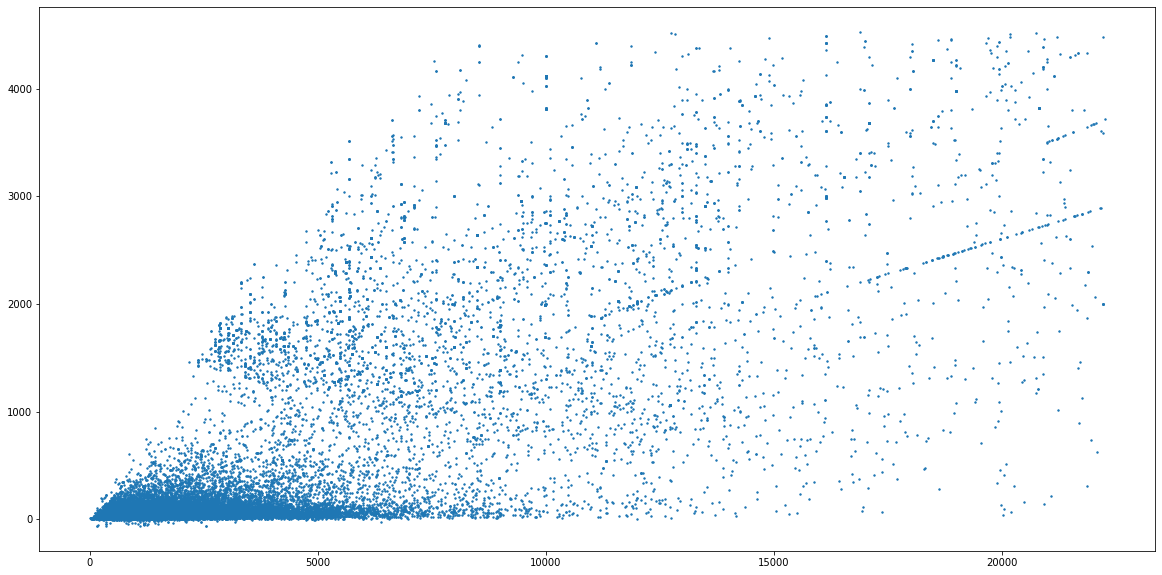

In [399]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(df['СреднийЧек'], df['СредняяМаржа'], s=2)

In [400]:
Alpha = []

def build_alpha(x):
    return Alpha[x - 1]

for i in range(1, 6):
    df_seg = df[df['Сегмент'] == i]
    Alpha.append(df_seg['income'].sum() / df_seg['СреднийЧек'].sum())

df['income'] = df['Сегмент'].apply(build_alpha)
print(df['income'].unique())
df['income'] = df['СреднийЧек'] * df['income']

[0.03285111 0.01210302 0.18253723 0.18266256 0.03509928]


In [401]:
df.drop(columns='flag', inplace=True)

In [402]:
df

,КоличествоЧеков,СреднийЧек,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,score,income
55525757-49565652494875,1.0,313.0,20.880000,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,Спящие,0.409764,10.282399
55545455-55555653564971,1.0,17000.0,4446.000000,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,В зоне риска,0.011682,205.751271
55565755-51575153564978,1.0,5043.0,33.277500,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.180912,Перспективные,2.648218,920.535242
55574848-48484848484870,1.0,3325.0,2198.510000,96.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,Спящие,0.011682,40.242528
55574848-48505250524971,1.0,4068.0,73.116667,111.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.138445,Спящие,1.879043,742.561445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,15.840000,115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.145854,Спящие,0.350106,25.525315
57505452-54485649575395,1.0,1760.0,55.000000,116.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.174147,Спящие,0.350106,57.817960
57505454-53495350565496,1.0,1995.0,74.000000,120.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.189293,Спящие,1.050317,65.537971
57545253-57515750515193,1.0,6270.0,570.000000,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,В зоне риска,0.409764,205.976481


In [403]:
df['RFM'].unique()

array(['Спящие', 'В зоне риска', 'Перспективные', 'Новички', 'Лояльные',
       'Дрейфующие', 'В зоне потери'], dtype=object)

In [404]:
RFM_bins = {'В зоне риска' : 1.05,
           'Перспективные' : 1.3,
           'Новички' : 1.1,
           'Лояльные' : 1.4,
           'Дрейфующие' : 1.2,
           'В зоне потери' : 1.05,
           'Спящие' : 1.}

def get_RFM_coeff(x):
    return RFM_bins[x]

df['RFM'] = df['RFM'].apply(get_RFM_coeff)

In [405]:
df

,КоличествоЧеков,СреднийЧек,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,score,income
55525757-49565652494875,1.0,313.0,20.880000,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,1.00,0.409764,10.282399
55545455-55555653564971,1.0,17000.0,4446.000000,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.064524,1.05,0.011682,205.751271
55565755-51575153564978,1.0,5043.0,33.277500,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0.180912,1.30,2.648218,920.535242
55574848-48484848484870,1.0,3325.0,2198.510000,96.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.064524,1.00,0.011682,40.242528
55574848-48505250524971,1.0,4068.0,73.116667,111.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.138445,1.00,1.879043,742.561445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,15.840000,115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.145854,1.00,0.350106,25.525315
57505452-54485649575395,1.0,1760.0,55.000000,116.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.174147,1.00,0.350106,57.817960
57505454-53495350565496,1.0,1995.0,74.000000,120.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.189293,1.00,1.050317,65.537971
57545253-57515750515193,1.0,6270.0,570.000000,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.077183,1.05,0.409764,205.976481


In [406]:
df['СредняяМаржа'].describe()

count    29858.000000
mean       445.229182
std        842.016667
min        -65.290000
25%         42.983750
50%         80.000000
75%        225.000000
max       4529.180000
Name: СредняяМаржа, dtype: float64

In [407]:
k = df['СредняяМаржа'].sum() / df['income'].sum()
df['СредняяМаржа'] = df['СредняяМаржа'] / k

df['СредняяМаржа'].describe()

count    29858.000000
mean       196.010012
std        370.693798
min        -28.743609
25%         18.923390
50%         35.219616
75%         99.055171
max       1993.949768
Name: СредняяМаржа, dtype: float64

In [408]:
INDICATORS = ['ВероятностьОтклика']

In [409]:
def get_border(df, column, border_1, border_2, border_3, border_4):
    sz = df[column].shape[0] - df[df[column] == 0.].shape[0]
    print(column, '->', round(df[(df[column] > 0) & (df[column] <= border_1)].shape[0] / sz * 100, 1),
                    round(df[(df[column] > border_1) & (df[column] <= border_2)].shape[0] / sz * 100, 1),
                    round(df[(df[column] > border_2) & (df[column] <= border_3)].shape[0] / sz * 100, 1),
                    round(df[(df[column] > border_3) & (df[column] <= border_4)].shape[0] / sz * 100, 1),
                    round(df[(df[column] > border_4)].shape[0] / sz * 100, 1)
        )

In [410]:
BORDERS = [
[0.125, 0.25, 0.33, 0.5],
]

for i, column in enumerate(INDICATORS):
    get_border(df, column, BORDERS[i][0], BORDERS[i][1], BORDERS[i][2], BORDERS[i][3])

ВероятностьОтклика -> 30.0 47.2 11.7 8.7 2.4


In [411]:
column_num = 0

def do_bin(x):
    if x <= BORDERS[column_num][0]:
        return 0.7
    elif x <= BORDERS[column_num][1]:
        return 1.0
    elif x <= BORDERS[column_num][2]:
        return 1.4
    elif x <= BORDERS[column_num][3]:
        return 1.7
    else:
        return 2.0

for i, column in enumerate(INDICATORS):
    column_num = i
    df[column] = df[column].apply(do_bin)

df

,КоличествоЧеков,СреднийЧек,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,score,income
55525757-49565652494875,1.0,313.0,9.192320,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.7,1.00,0.409764,10.282399
55545455-55555653564971,1.0,17000.0,1957.330172,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.7,1.05,0.011682,205.751271
55565755-51575153564978,1.0,5043.0,14.650260,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1.0,1.30,2.648218,920.535242
55574848-48484848484870,1.0,3325.0,967.883481,96.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.7,1.00,0.011682,40.242528
55574848-48505250524971,1.0,4068.0,32.189262,111.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1.0,1.00,1.879043,742.561445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,6.973484,115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,1.00,0.350106,25.525315
57505452-54485649575395,1.0,1760.0,24.213486,116.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,1.00,0.350106,57.817960
57505454-53495350565496,1.0,1995.0,32.578145,120.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,1.00,1.050317,65.537971
57545253-57515750515193,1.0,6270.0,250.939766,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.7,1.05,0.409764,205.976481


In [412]:
df['ВероятностьОтклика'].describe()

count    29858.000000
mean         1.041778
std          0.332654
min          0.700000
25%          0.700000
50%          1.000000
75%          1.000000
max          2.000000
Name: ВероятностьОтклика, dtype: float64

In [413]:
df['real_score'] = df['ВероятностьОтклика'] * df['RFM'] * df['score'] * (0.2 * df['СредняяМаржа'] + 0.8 * df['income'])

In [414]:
df

,КоличествоЧеков,СреднийЧек,СредняяМаржа,ДатаПоследнегоЗаказаВЫК,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,URAL,SIBERIA,FAR EAST,Сегмент,ВероятностьОтклика,RFM,score,income,real_score
55525757-49565652494875,1.0,313.0,9.192320,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.7,1.00,0.409764,10.282399,2.886815
55545455-55555653564971,1.0,17000.0,1957.330172,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.7,1.05,0.011682,205.751271,4.774548
55565755-51575153564978,1.0,5043.0,14.650260,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1.0,1.30,2.648218,920.535242,2545.376021
55574848-48484848484870,1.0,3325.0,967.883481,96.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.7,1.00,0.011682,40.242528,1.846220
55574848-48505250524971,1.0,4068.0,32.189262,111.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1.0,1.00,1.879043,742.561445,1128.340654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57505450-51505751525597,1.0,777.0,6.973484,115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,1.00,0.350106,25.525315,7.637541
57505452-54485649575395,1.0,1760.0,24.213486,116.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,1.00,0.350106,57.817960,17.889380
57505454-53495350565496,1.0,1995.0,32.578145,120.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0,1.00,1.050317,65.537971,61.912020
57545253-57515750515193,1.0,6270.0,250.939766,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0.7,1.05,0.409764,205.976481,64.743653


In [415]:
df.to_csv('../data/scores.csv')

In [416]:
df['real_score'].describe()

count    29858.000000
mean       324.900378
std        858.094873
min         -0.295984
25%         10.357502
50%         29.390272
75%        147.633496
max      13925.721281
Name: real_score, dtype: float64

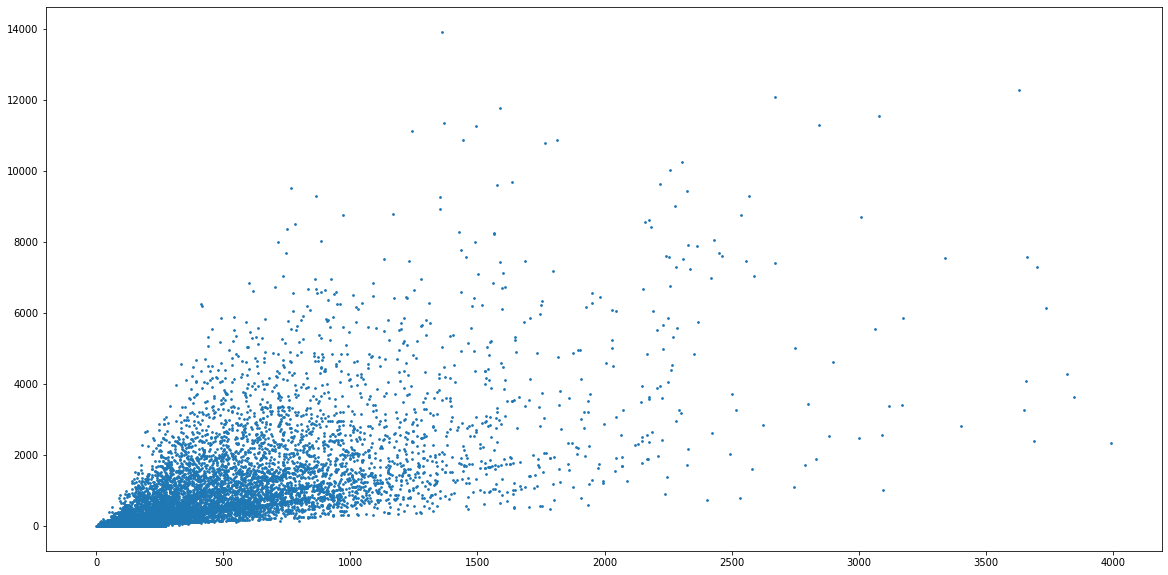

In [417]:
plt.figure(figsize=(20, 10))
plt.scatter(df['income'], df['real_score'], s=3)

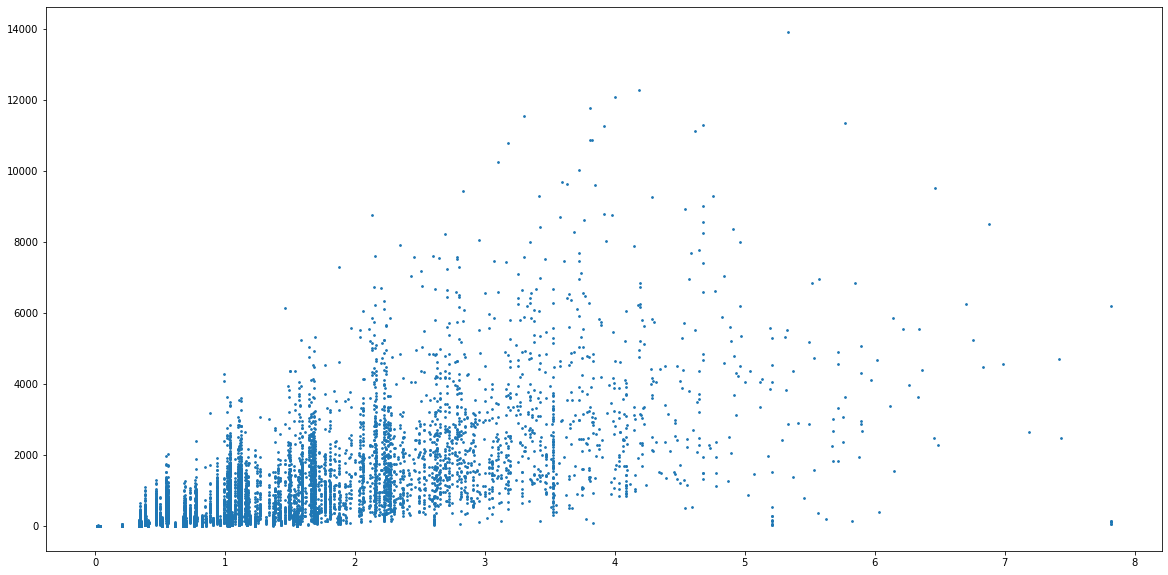

In [418]:
plt.figure(figsize=(20, 10))
plt.scatter(df['score'], df['real_score'], s=3)